In [1]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("../cat-and-dog/"))

['.ipynb_checkpoints', 'Cats and Dogs.ipynb', 'test_set', 'training_set']


In [5]:
from random import shuffle
import random
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

# Data Preprocessing 

In [6]:
cat_data = os.listdir('../cat-and-dog/training_set/training_set/cats/')
print(cat_data[:10]) #the output we get are the .jpg files

dog_data = os.listdir('../cat-and-dog/training_set/training_set/dogs/')
print('\n')
print(dog_data[:10])

['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg']


['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']


In [7]:
print(f"we have {len(cat_data)} pictures of cats")

we have 4001 pictures of cats


In [8]:
print(f"we have {len(dog_data)} pictures of dogs")

we have 4006 pictures of dogs


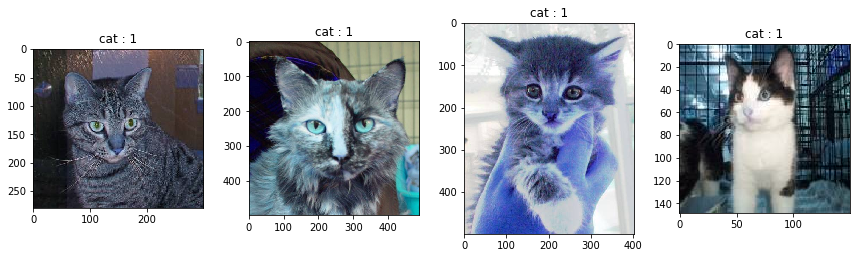

In [9]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../cat-and-dog/training_set/training_set/cats' + "/" + cat_data[i])
    plt.imshow(img)
    plt.title('cat : 1')
    plt.tight_layout()
plt.show()

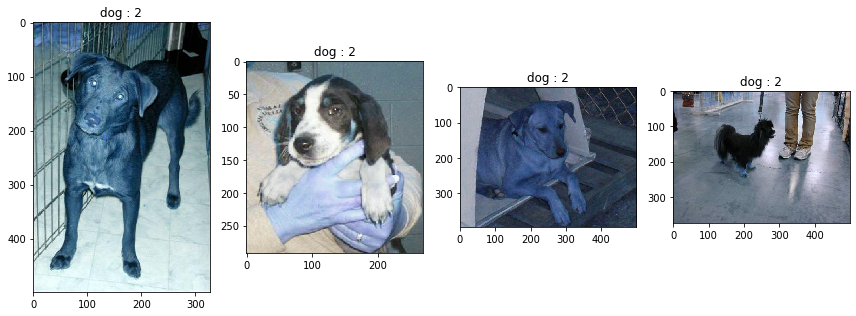

In [10]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../cat-and-dog/training_set/training_set/dogs' + "/" + dog_data[i])
    plt.imshow(img)
    plt.title('dog : 2')
    plt.tight_layout()
plt.show()

In [11]:
data = []
labels = []
for img in cat_data:
    try:
        img_read = plt.imread('../cat-and-dog/training_set/training_set/cats' + "/" + img)
        img_resize = cv2.resize(img_read, (100, 100))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in dog_data:
    try:
        img_read = plt.imread('../cat-and-dog/training_set/training_set/dogs' + "/" + img)
        img_resize = cv2.resize(img_read, (100, 100))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

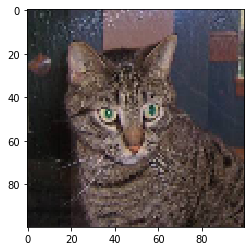

In [12]:
# plt.imshow(data[0])
plt.imshow((data[0]).astype(np.uint8))
plt.show()

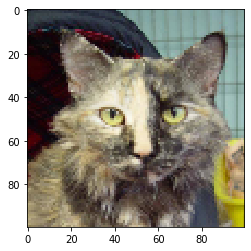

In [13]:
plt.imshow((data[1]).astype(np.uint8))
plt.show()

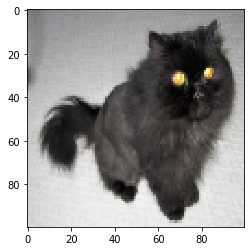

In [14]:
plt.imshow((data[200]).astype(np.uint8))
plt.show()

In [15]:
shuffled_data = random.sample(data, len(data))

In [16]:
len(shuffled_data)

8005

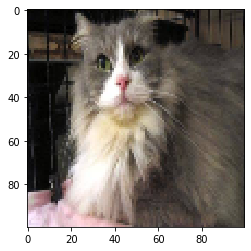

In [17]:
plt.imshow((shuffled_data[0]).astype(np.uint8))
plt.show()

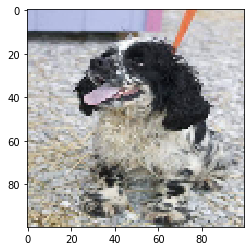

In [37]:
plt.imshow((shuffled_data[1]).astype(np.uint8))
plt.show()

# Splitting data 

In [18]:
image_data = np.array(shuffled_data)
labels = np.array(labels)

In [19]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [20]:
idx

array([ 602, 5428, 4973, ..., 4811, 6843, 7238])

In [21]:
labels

array([1, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 42)

In [23]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [25]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (6404, 100, 100, 3)
SHAPE OF TESTING IMAGE DATA : (1601, 100, 100, 3)
SHAPE OF TRAINING LABELS : (6404, 2)
SHAPE OF TESTING LABELS : (1601, 2)


# Import Deep Learning libraries: Tensorflow, Keras

In [26]:
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

# Define a CNN

In [28]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [29]:
#instantiate the model
height = 100
width = 100
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 49, 49, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 32)        1

# Training and Evaluation

In [30]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [31]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Train on 6404 samples
Epoch 1/20
6404/6404 [==============================] - 151s 24ms/sample - loss: 1.1082 - accuracy: 0.4945
Epoch 2/20
6404/6404 [==============================] - 142s 22ms/sample - loss: 0.7994 - accuracy: 0.5228
Epoch 3/20
6404/6404 [==============================] - 144s 23ms/sample - loss: 0.7364 - accuracy: 0.5178
Epoch 4/20
6404/6404 [==============================] - 143s 22ms/sample - loss: 0.7277 - accuracy: 0.5236
Epoch 5/20
6404/6404 [==============================] - 138s 22ms/sample - loss: 0.7125 - accuracy: 0.5409
Epoch 6/20
6404/6404 [==============================] - 139s 22ms/sample - loss: 0.7052 - accuracy: 0.5481
Epoch 7/20
6404/6404 [==============================] - 167s 26ms/sample - loss: 0.6961 - accuracy: 0.5695
Epoch 8/20
6404/6404 [==============================] - 156s 24ms/sample - loss: 0.6850 - accuracy: 0.5718
Epoch 9/20
6404/6404 [==============================] - 163s 25ms/sample - loss: 0.6829 - accuracy: 0.5881
Epoch 10/20
640

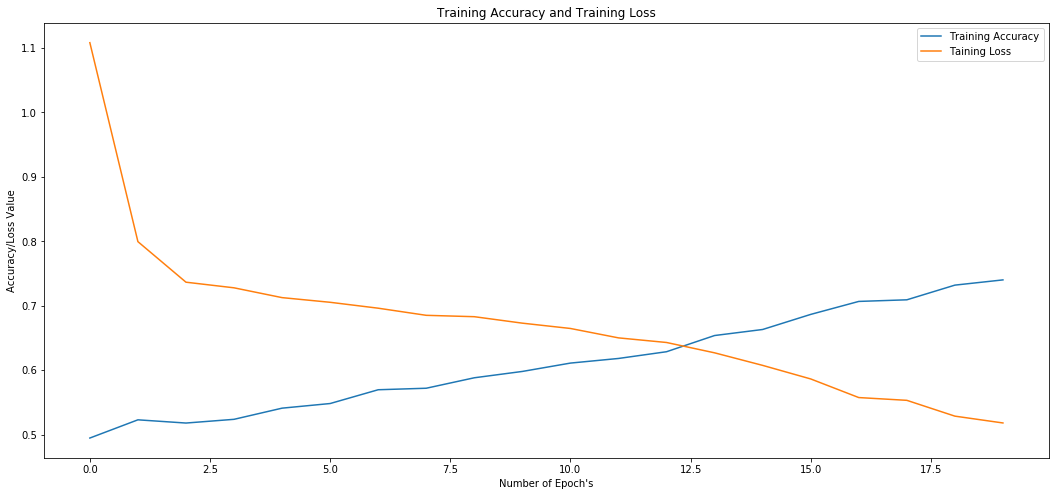

In [32]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
plt.show()

In [33]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

1601/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [34]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.8279438223189521
ACCURACY : 0.4828232228755951


# WITH DATA AUGMENTATION

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [38]:
#calling the same model as above
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

## Training and eveluating the augmented model

In [39]:
#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [40]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 30)

Epoch 1/30
 11/100 [==>...........................] - ETA: 3:08 - loss: 1.5662 - accuracy: 0.5028

KeyboardInterrupt: 

In [ ]:
#evaluate the model on augmented test data
predict = model_aug.evaluate_generator(val_generator, steps = 5)

In [ ]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

In [ ]:
model.save('first_model_cnn.h5')
model_aug.save("second_model_augmented.h5")

# Saving and testing the model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilnet import preprocess_input
import numpy as np
model1 = load_model('first_model_cnn.h5')
model2 = load_model("second_model_augmented.h5")

In [ ]:
%matplotlib inline

from tensorflow.keras.applications.mobilenet import preprocess_input


from PIL import Image, ImageFile



# image_test_animal = os.listdir('../cat-and-dog/training_set/test_set/test_set/test/')

images = [
    '../cat-and-dog/training_set/test_set/test_set/test/cat.4001.jpg',
    '../cat-and-dog/training_set/test_set/test_set/test/cat.4002.jpg',
    '../cat-and-dog/training_set/test_set/test_set/test/cat.4003.jpg',
    '../cat-and-dog/training_set/test_set/test_set/test/cat.4004.jpg',
    '../cat-and-dog/training_set/test_set/test_set/test/dog.4001.jpg',
    '../cat-and-dog/training_set/test_set/test_set/test/dog.4002.jpg',
    '../cat-and-dog/training_set/test_set/test_set/test/dog.4003.jpg',
    '../cat-and-dog/training_set/test_set/test_set/test/dog.4004.jpg',

]
for pic in images:
    x=[]
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    img = Image.open(pic)
    img.load()
    img = img.resize((50,50), Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    print(pred)
    display ("--------------------------------------------------------------------------------------------------------------------")
    display(img)
    labels = ["uninfected","parasite"]
    print(np.argmax(pred,axis=1))
    print(labels[np.argmax(pred,axis=1)[0]])
#     list = decode_predictions(pred, top=5)
#     for item in list[0]:
#           print(itm)    ---------------cant do this one here-------------------------------